In [1]:
cd ../src

/home/luka/Dropbox/msc_icl/541_Individual_Project/src


In [12]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import sys,os
sys.path.append('../src')
from pyexp import PyExp


def load_disfa(normalisation_type=None,
               quick=False,
               scaling=None,
               quiet=True):
    print 'Working....'
    if quiet:
        # REDIRECT STDOUT ###################
        tmp = sys.stdout                    #
        sys.stdout = open(os.devnull,"w")   #
        #####################################
    config = PyExp(config_file='config/cnn.yaml', path='/tmp', config_overwrite=None)

    import disfa
    reload(disfa)
    if quick:
        config.config['data']['train_subjects'] = [1]
        config.config['data']['validation_subjects'] = [2]
        config.config['data']['test_subjects'] = [2]
    
    config.config['data']['normalisation_type'] = normalisation_type
    config.config['data']['scaling'] = scaling
    data = disfa.Disfa(config['data'])
    if quiet:
        # UNDO STDOUT REDIRECT ##############
        sys.stdout = tmp                    #
        #####################################
    print 'Done.'
    return data

def plot_images(images,names=None,cmap='Spectral',interpolation='none',title=None,inverse=False):
    
    if names == None:
        names = ['image_'+str(i) for i in xrange(len(images))]
    
    fig_size = matplotlib.rcParams['figure.figsize']
    matplotlib.rcParams['figure.figsize'] = (20.0, 4.0)
    matplotlib.rcParams['savefig.dpi'] = 200
    matplotlib.rcParams['font.size'] = 15
    matplotlib.rcParams['figure.dpi'] = 400
    
    fig = plt.figure()
    plt.suptitle(title)
    
    cmap = 'Spectral'
    
    for i,image in enumerate(images):
        plt.subplot(1,len(images),i+1)
        plt.imshow(images[i],interpolation='none',cmap=cmap)
        plt.title(names[i])
        plt.colorbar()
    plt.show()

    
def show_batch_faces(batch,inverse=False):
    images = []
    names = []
    if inverse:
        batch.images = batch.inverse_process(batch.images)
    images.append(batch.images[0,:,:])
    names.append('a face')
    images.append(batch.images.min(axis=0))
    names.append('minimum face')
    images.append(batch.images.max(axis=0))
    names.append('maximum face')
    images.append(batch.images.mean(axis=0))
    names.append('mean face')
    images.append(batch.images.std(axis=0))
    names.append('stdev face')
    plot_images(images,names,title=batch.batch_type,inverse=inverse)
    
def dataset_stats(normalisation_type=None,
                  scaling=None,
                  quick=True,
                  quiet=False):
    data = load_disfa(normalisation_type=normalisation_type,
                      scaling=scaling,quick=quick,quiet=quiet)
    print data.train.images.shape
    print data.validation.images.shape
    show_batch_faces(data.train)
    show_batch_faces(data.train,inverse=True)
    show_batch_faces(data.validation)
    show_batch_faces(data.validation,inverse=True)
    del data

# None,None

Working....
Setting up folder structure.
Saving config file to /tmp/2016_07_26/107
OPENING  /tmp/2016_07_26/107/NOT_FINISHED
Creating train batch.
Loading labels and images for subjects: [1]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
/tmp/2016_07_26/../hashed_datasets/train_-7393600217779582131.npz
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


None
Applying scaling:  [-1,1]
SAVING HASHFILE FOR FUTURE USE train
Creating validation batch.
Loading labels and images for subjects: [2]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
/tmp/2016_07_26/../hashed_datasets/validation_-7393600217782908670.npz
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN002_features_images.mat


None
Applying scaling:  [-1,1]
SAVING HASHFILE FOR FUTURE USE validation
Done.
(4845, 47, 47)
(4845, 47, 47)


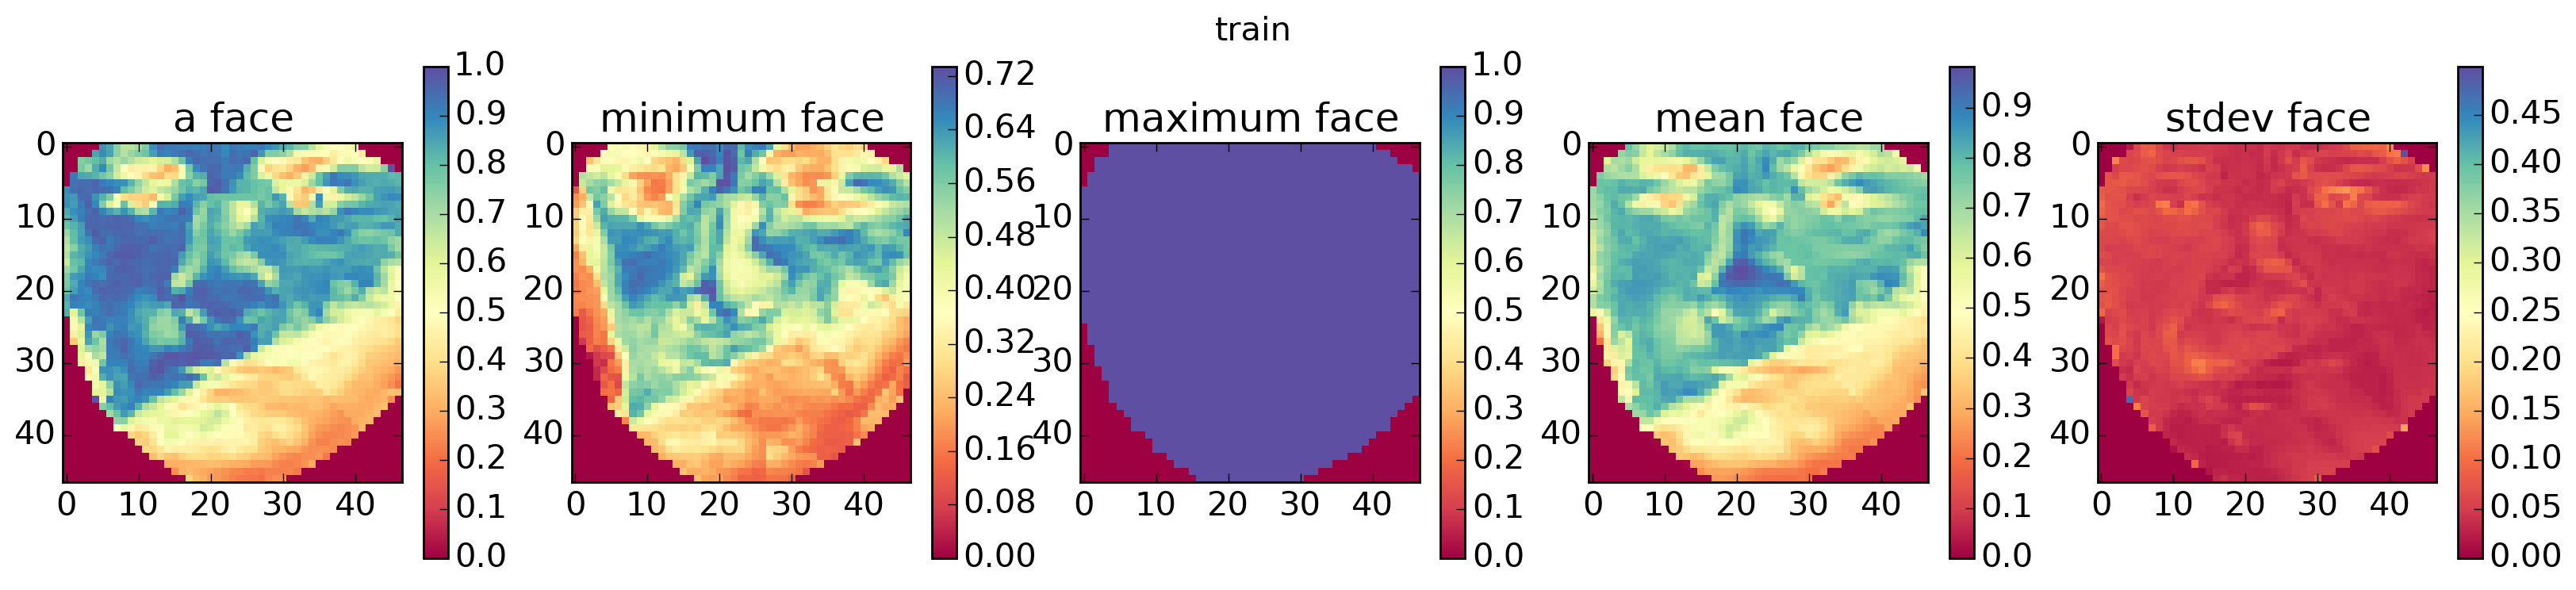

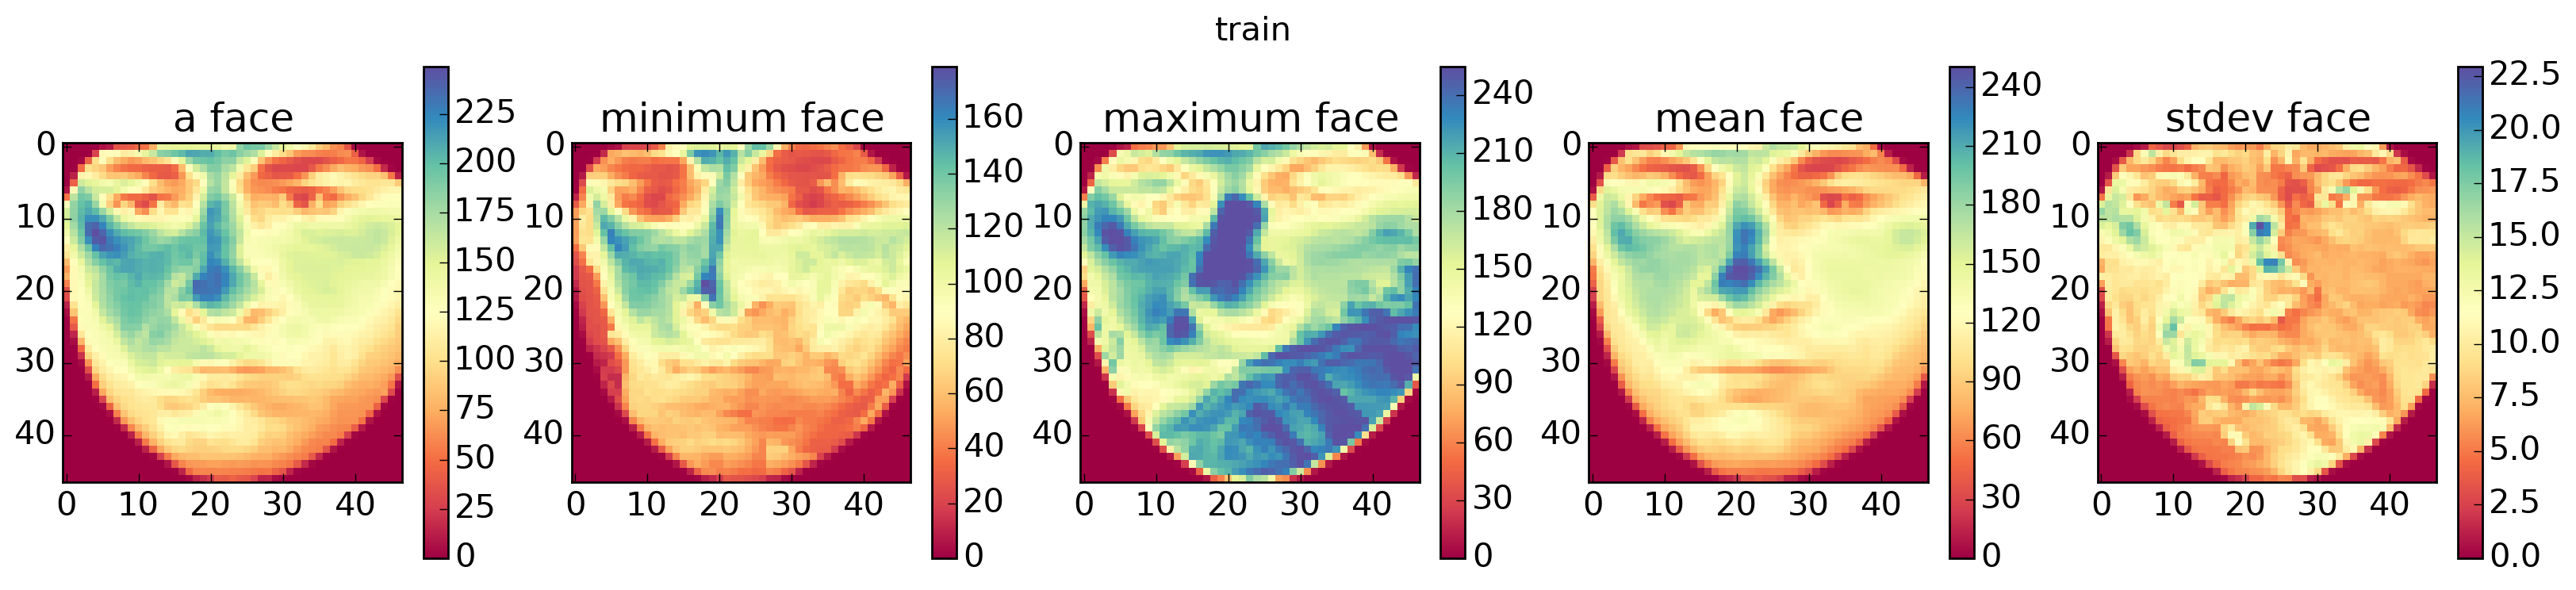

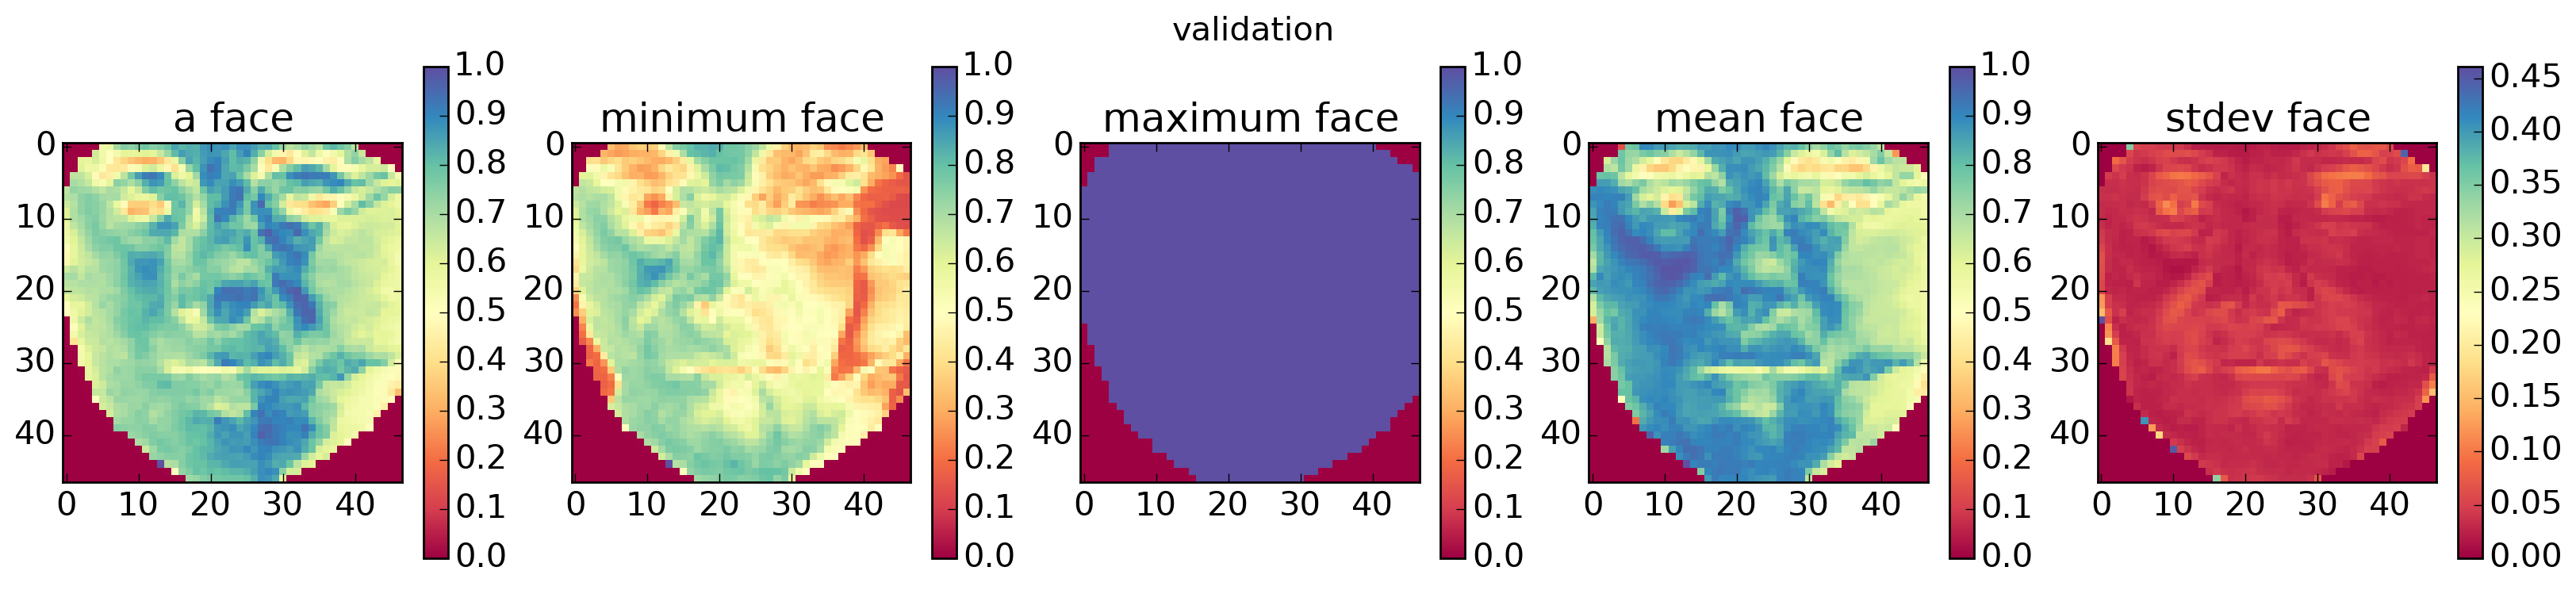

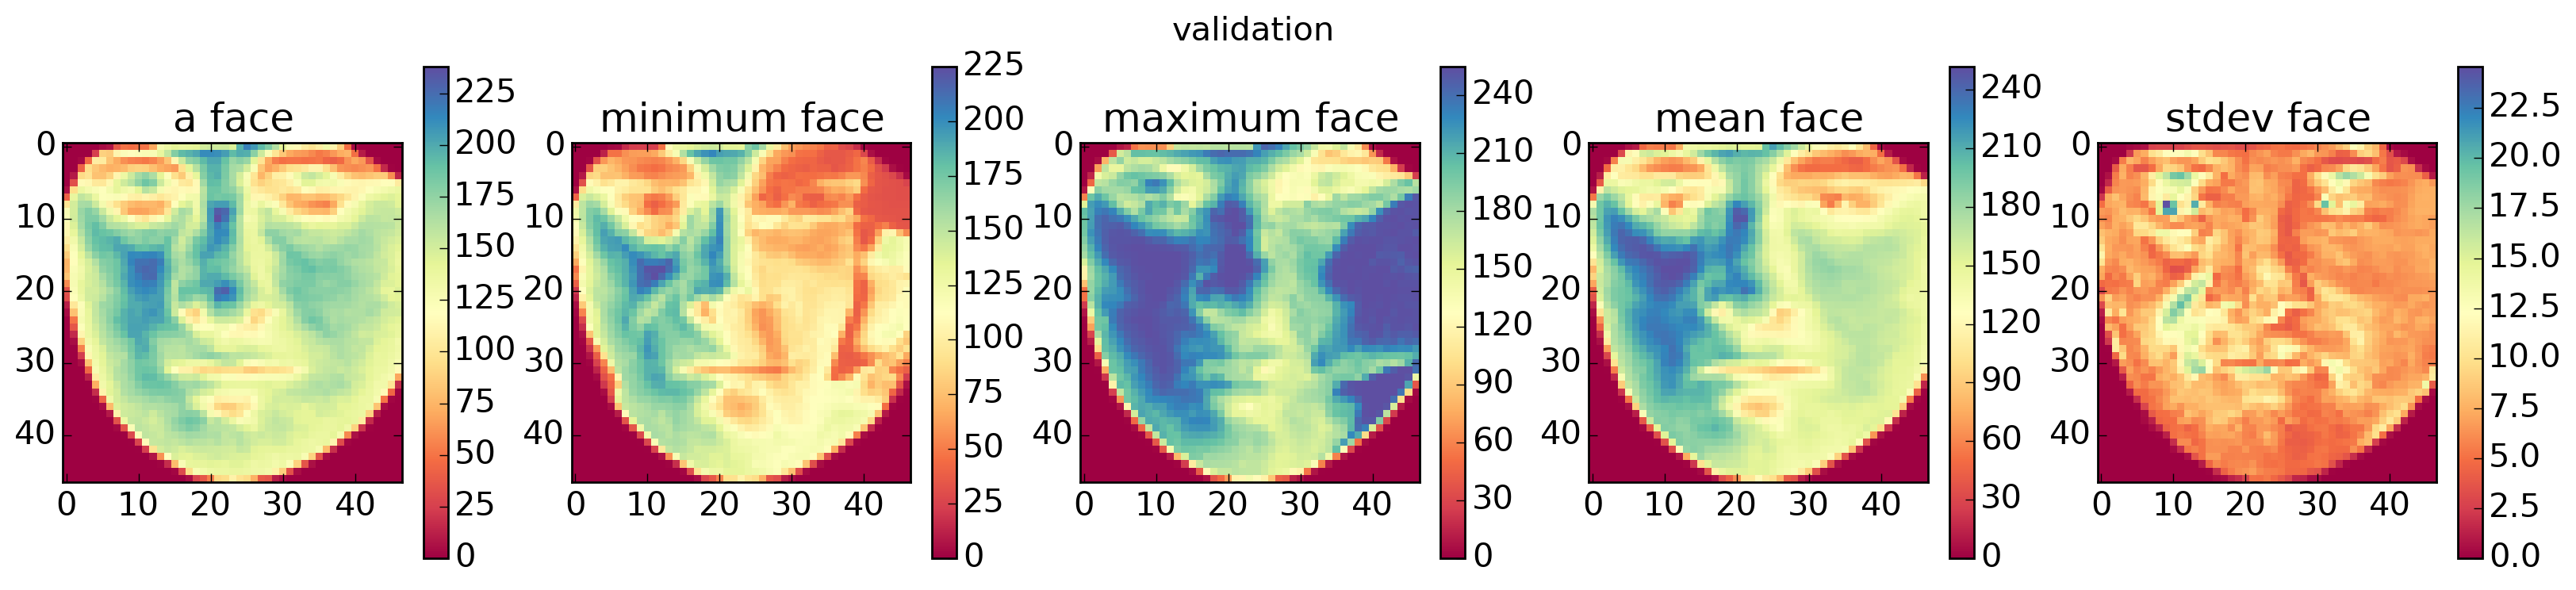

In [14]:
dataset_stats(scaling='[-1,1]')

# contrast, None

Working....
Setting up folder structure.
Saving config file to /tmp/2016_07_26/100
OPENING  /tmp/2016_07_26/100/NOT_FINISHED
Creating train batch.
Loading labels and images for subjects: [1]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


contrast


Applying scaling:  none
Creating validation batch.
Loading labels and images for subjects: [2]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN002_features_images.mat


contrast


Applying scaling:  none
Done.
(4845, 47, 47)
(4845, 47, 47)


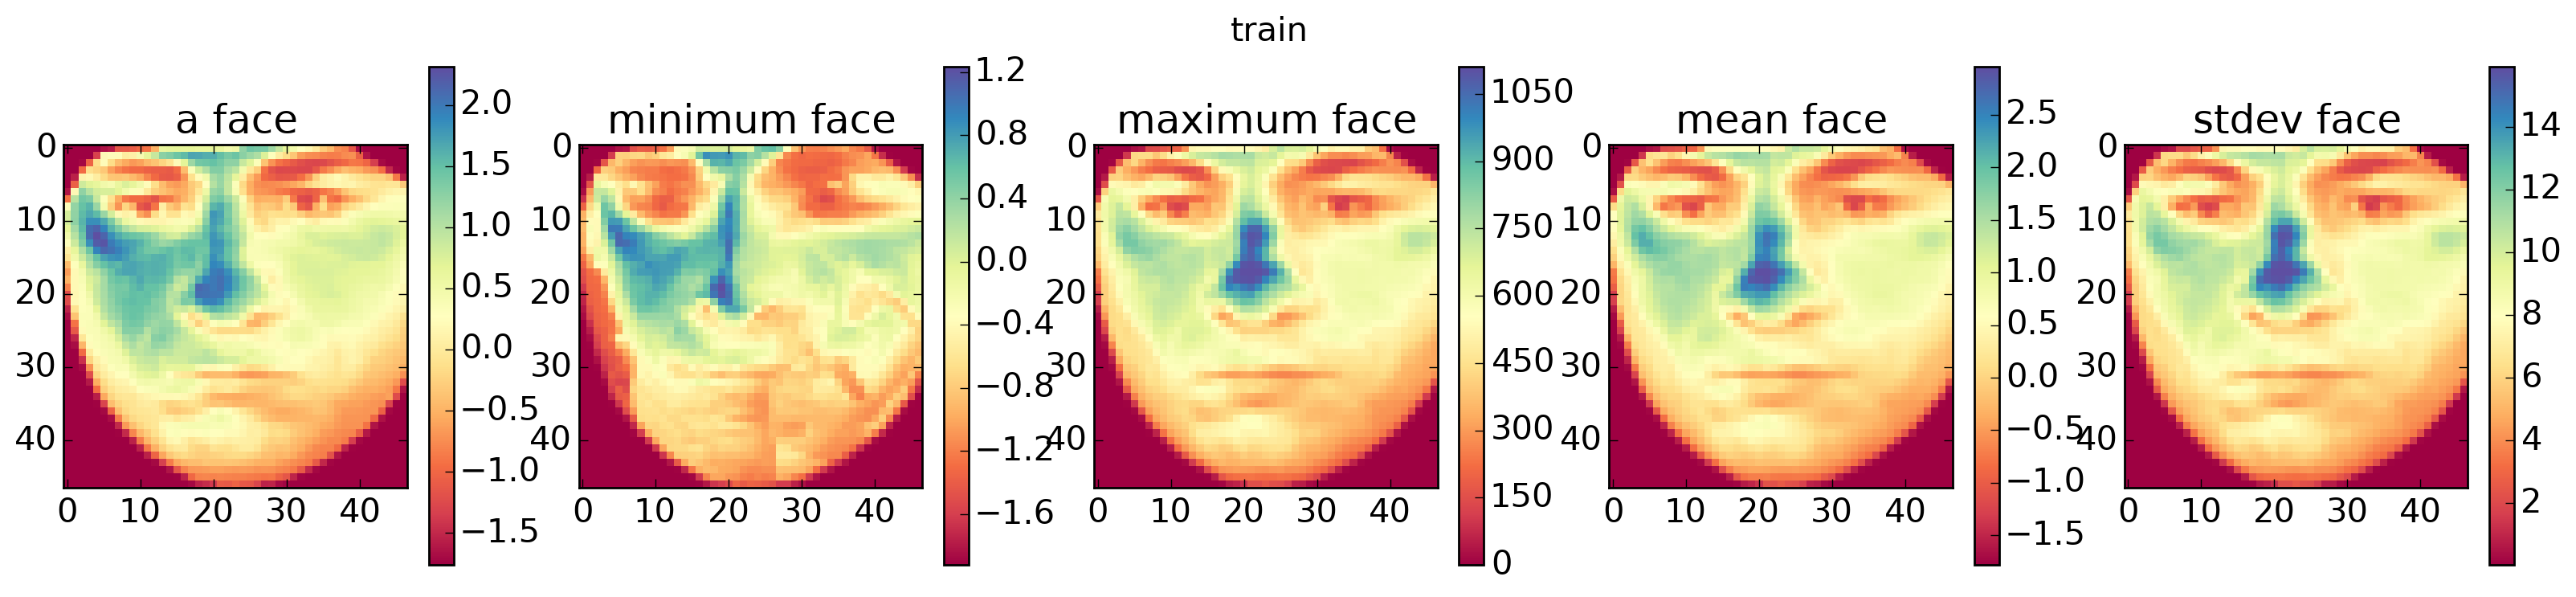

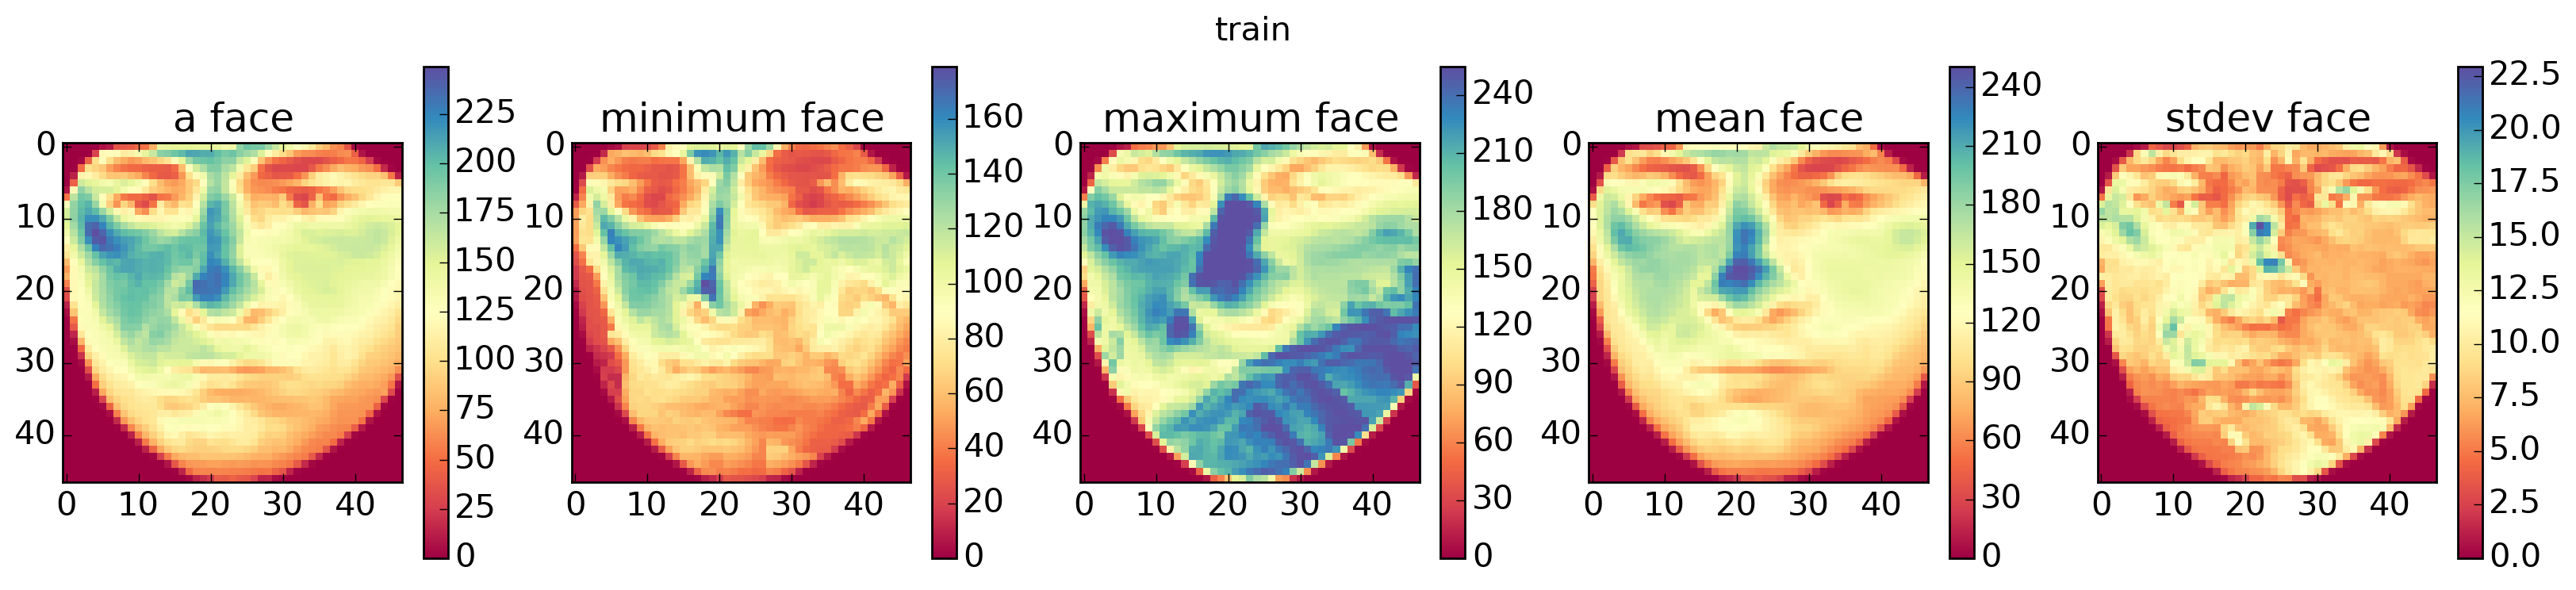

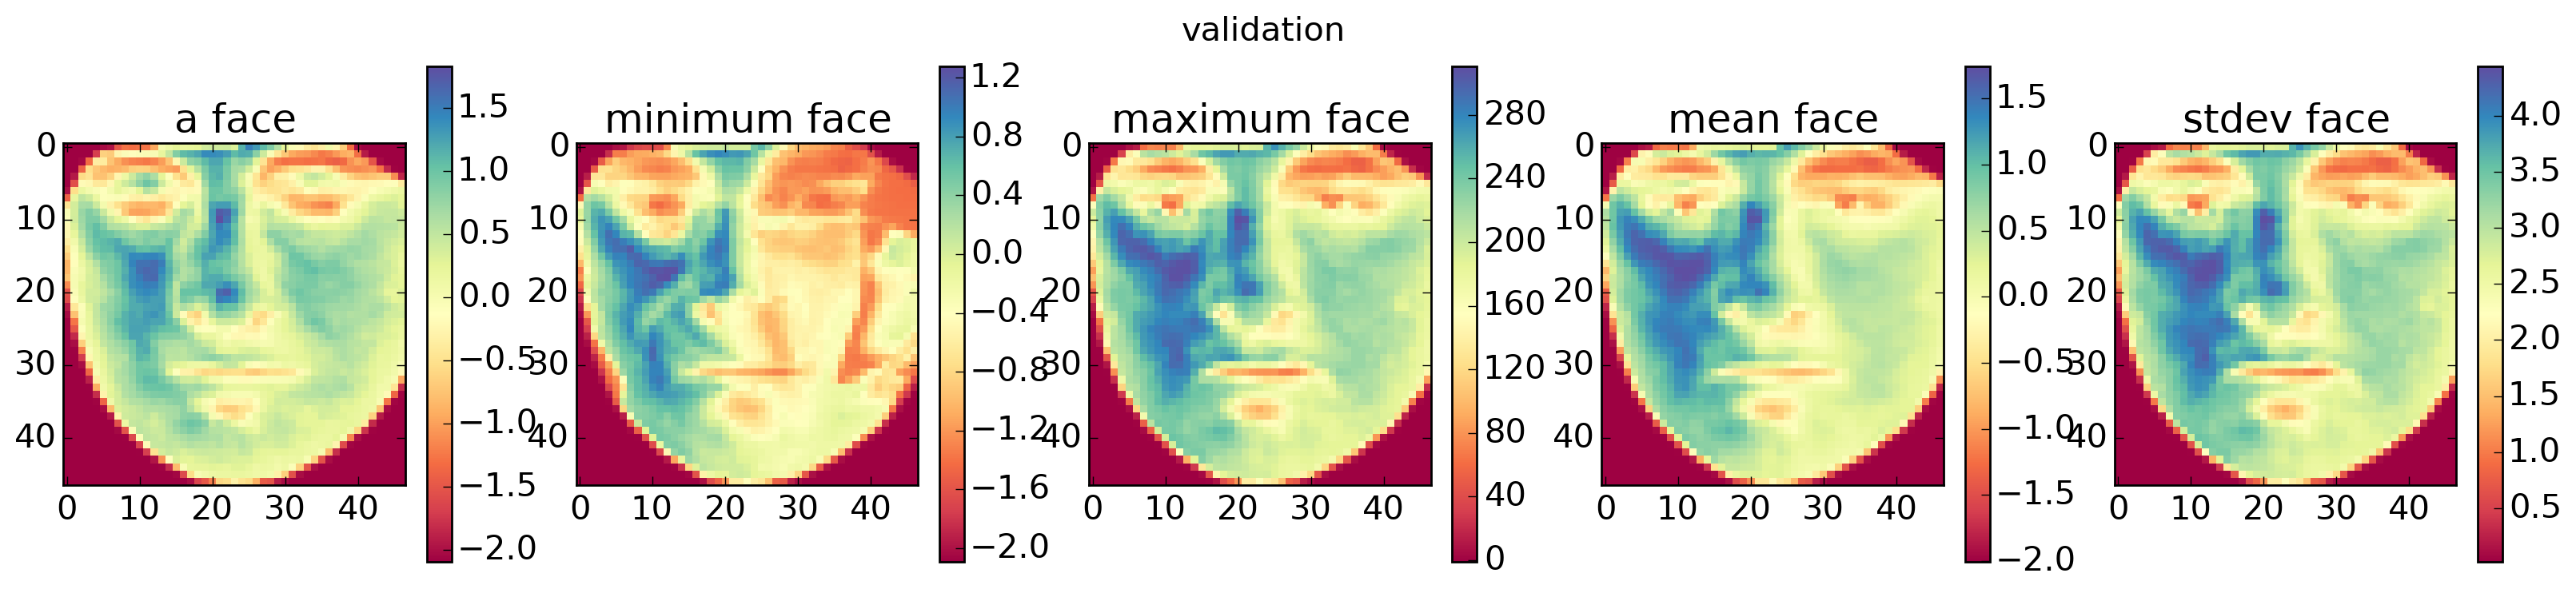

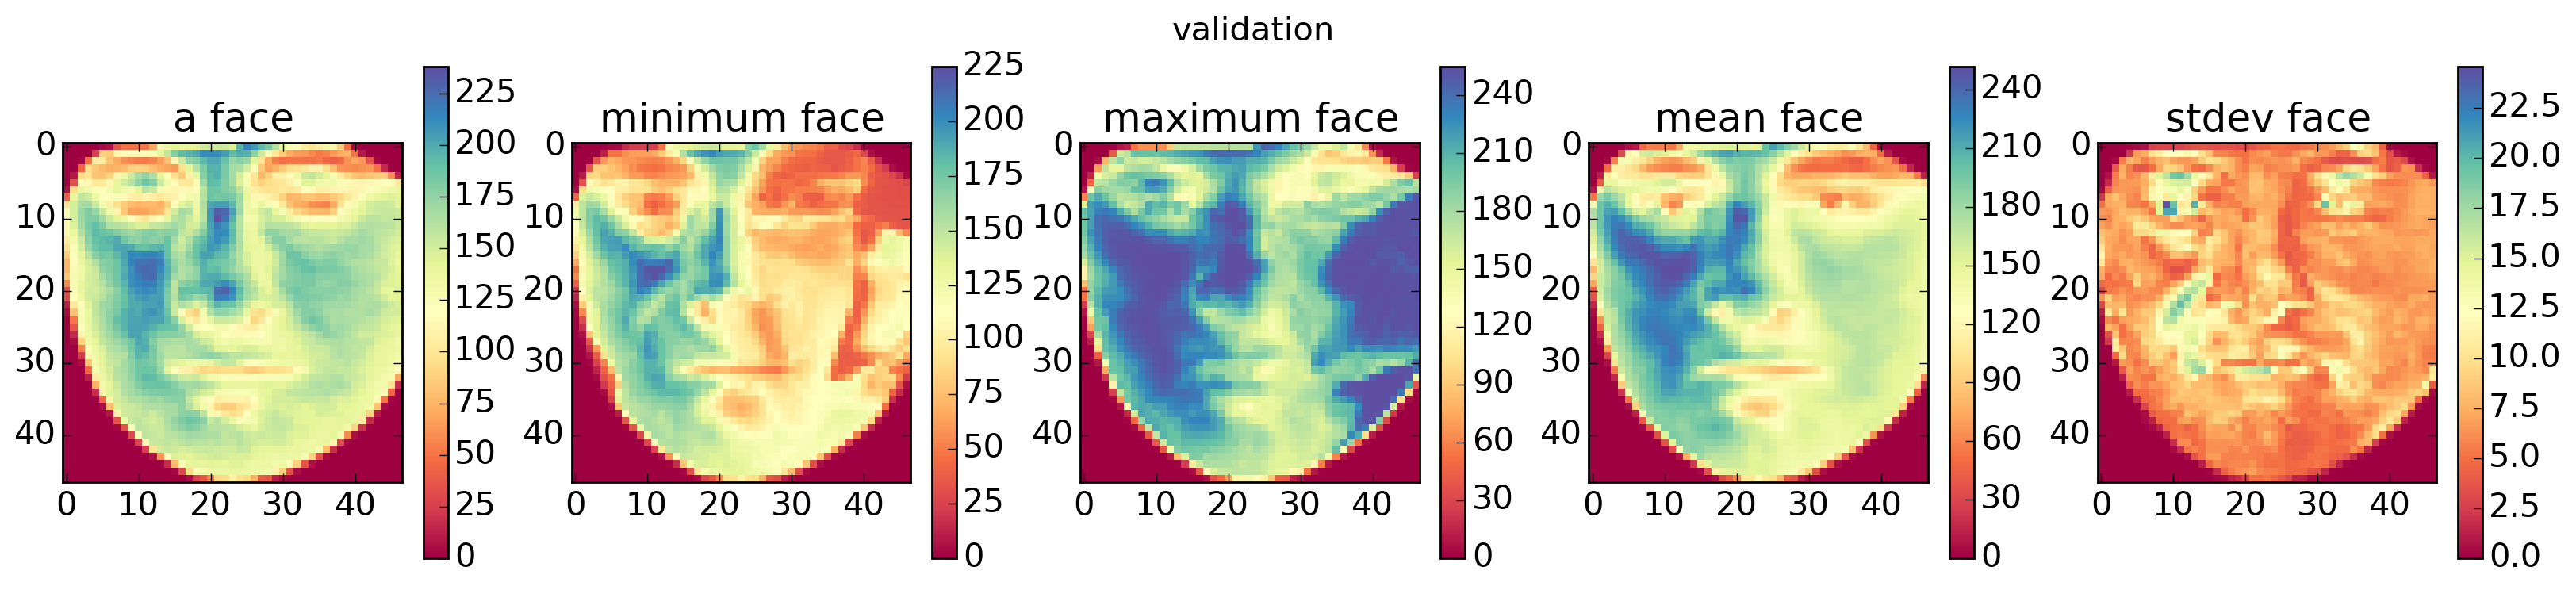

In [4]:
dataset_stats(normalisation_type='contrast',scaling='none')

# contrast, [-1,1]

Working....
Setting up folder structure.
Saving config file to /tmp/2016_07_26/106
OPENING  /tmp/2016_07_26/106/NOT_FINISHED
Creating train batch.
Loading labels and images for subjects: [1]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


contrast


Applying scaling:  [-1,1]
Creating validation batch.
Loading labels and images for subjects: [2]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN002_features_images.mat


contrast


Applying scaling:  [-1,1]
Done.
(4845, 47, 47)
(4845, 47, 47)


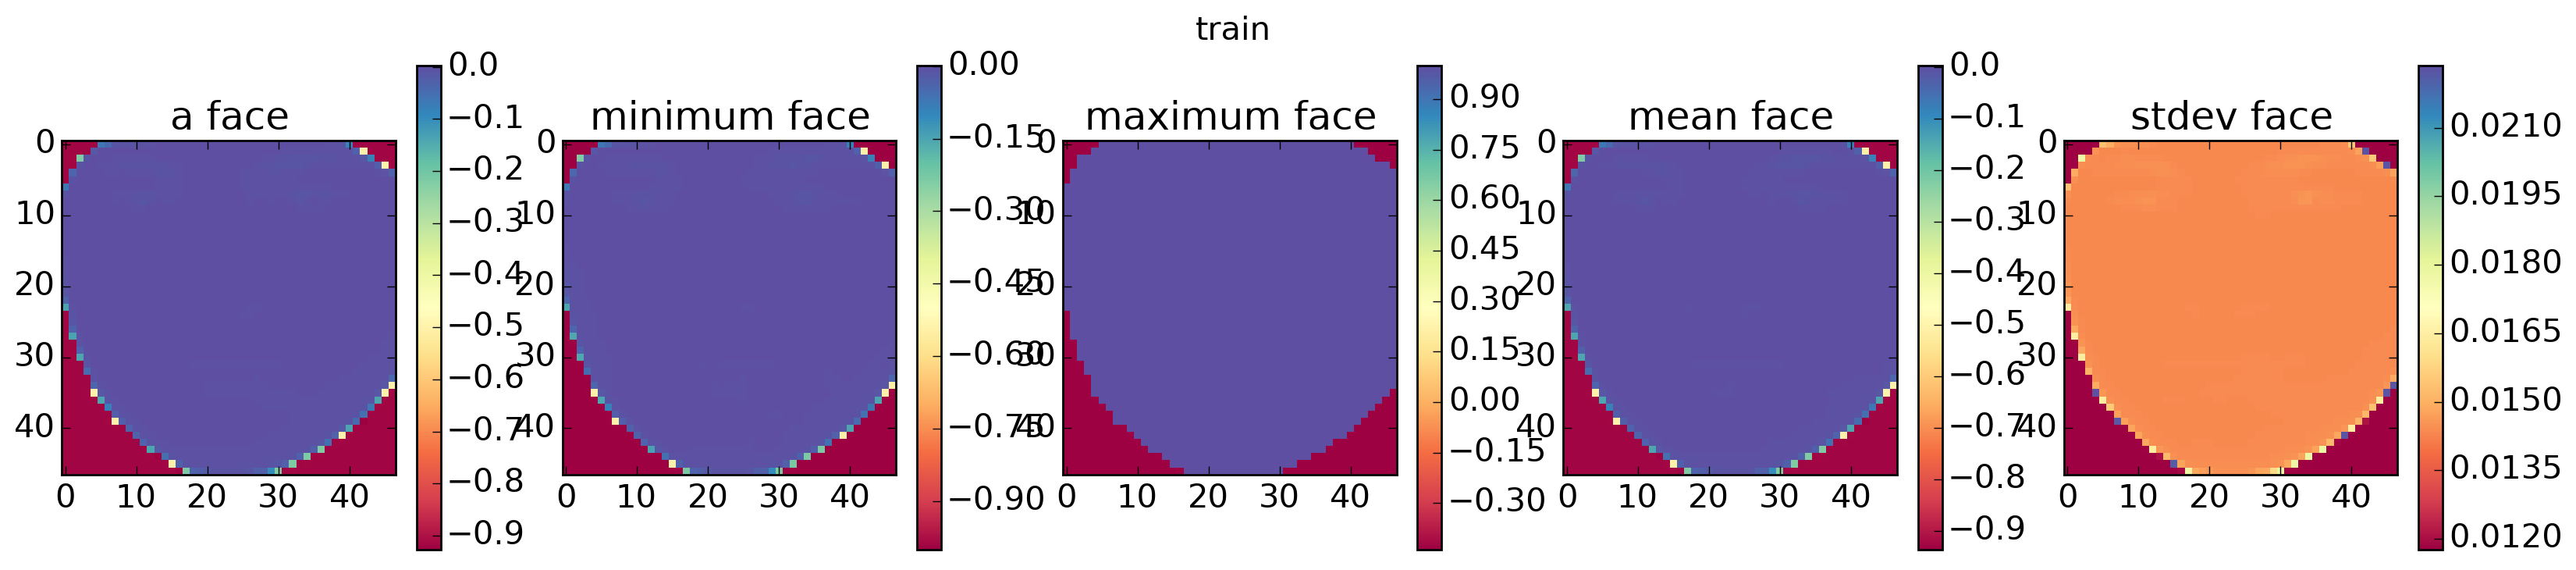

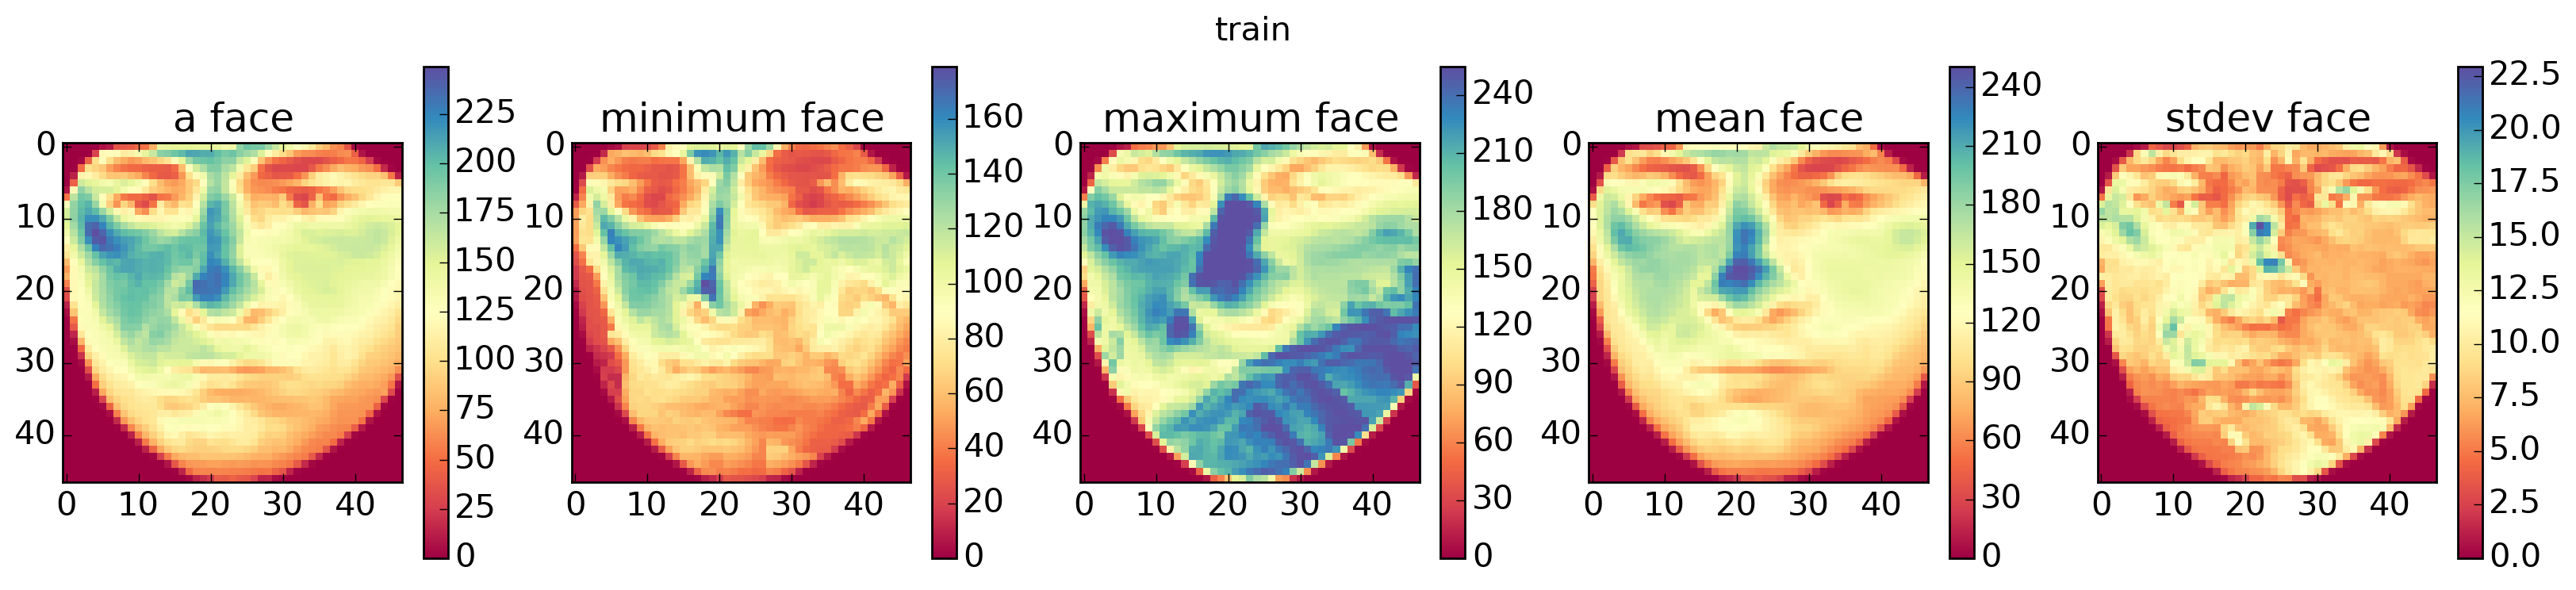

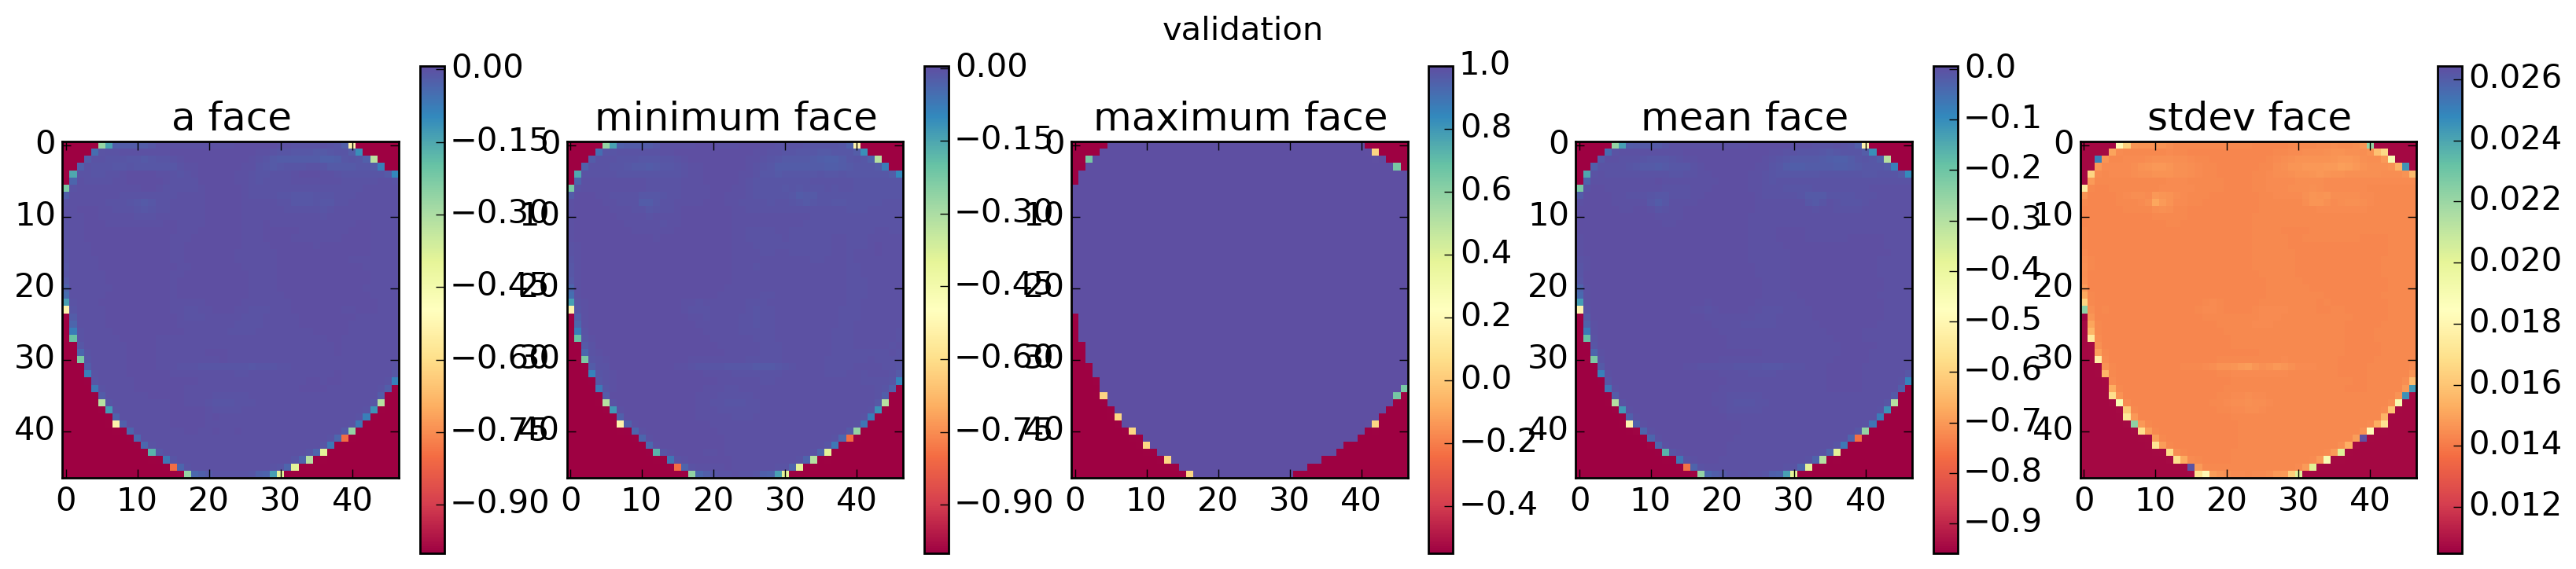

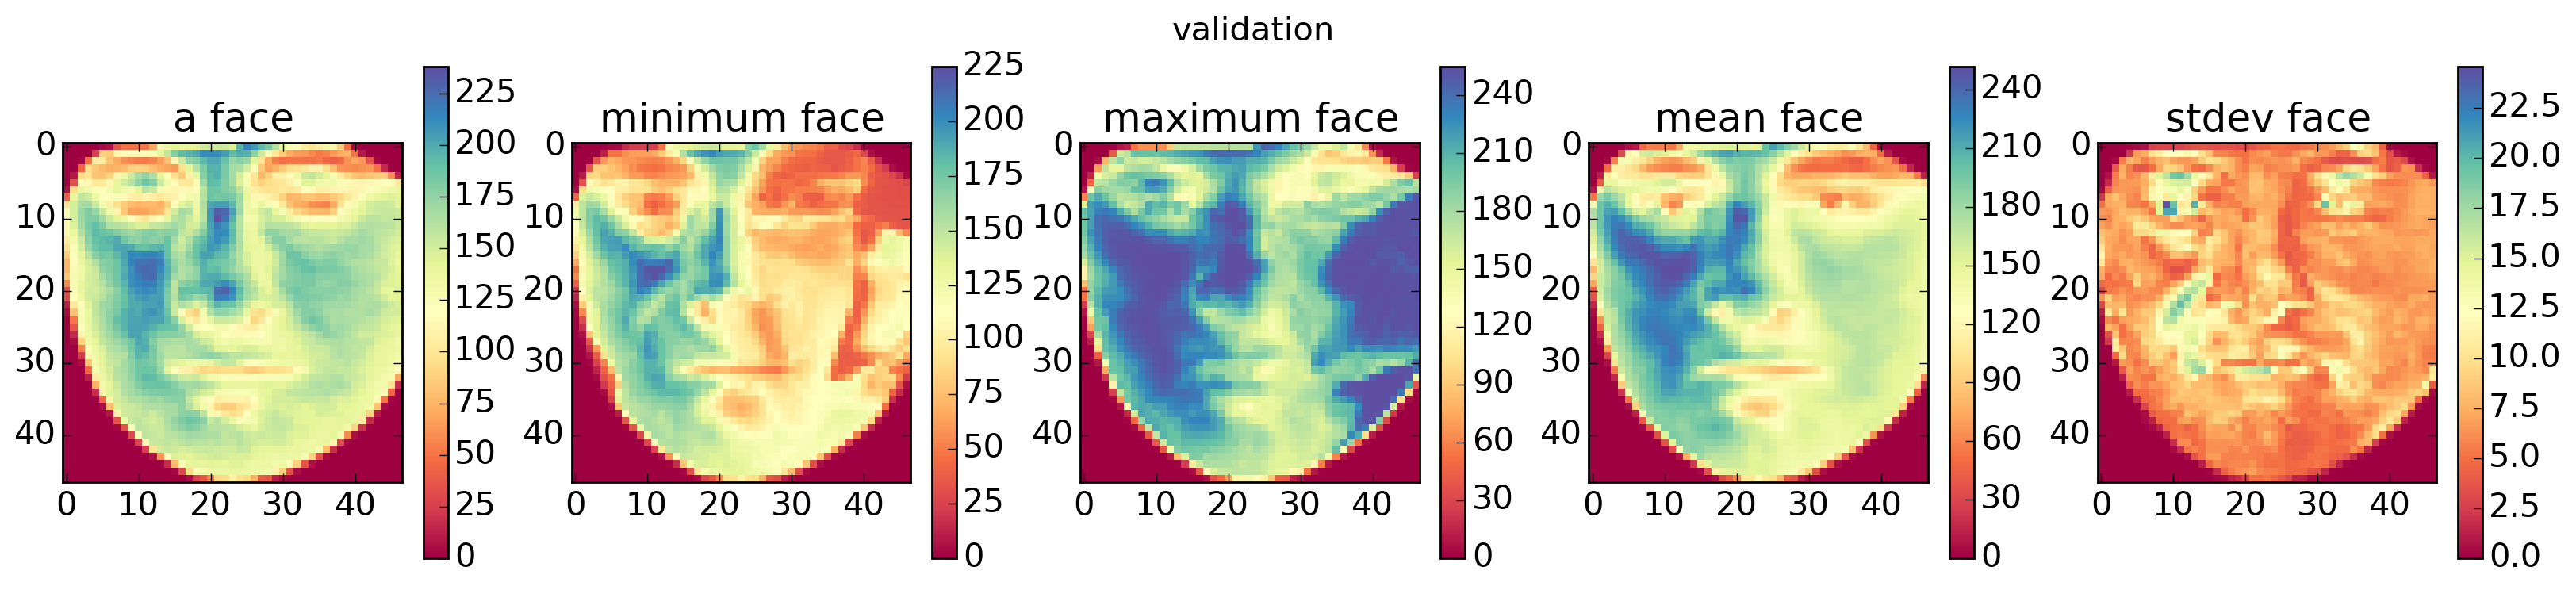

In [13]:
dataset_stats(normalisation_type='contrast',scaling='[-1,1]')

# face, None

Working....
Setting up folder structure.
Saving config file to /tmp/2016_07_26/102
OPENING  /tmp/2016_07_26/102/NOT_FINISHED
Creating train batch.
Loading labels and images for subjects: [1]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


face


Applying scaling:  None
Creating validation batch.
Loading labels and images for subjects: [2]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN002_features_images.mat


face


Applying scaling:  None
Done.
(4845, 47, 47)
(4845, 47, 47)


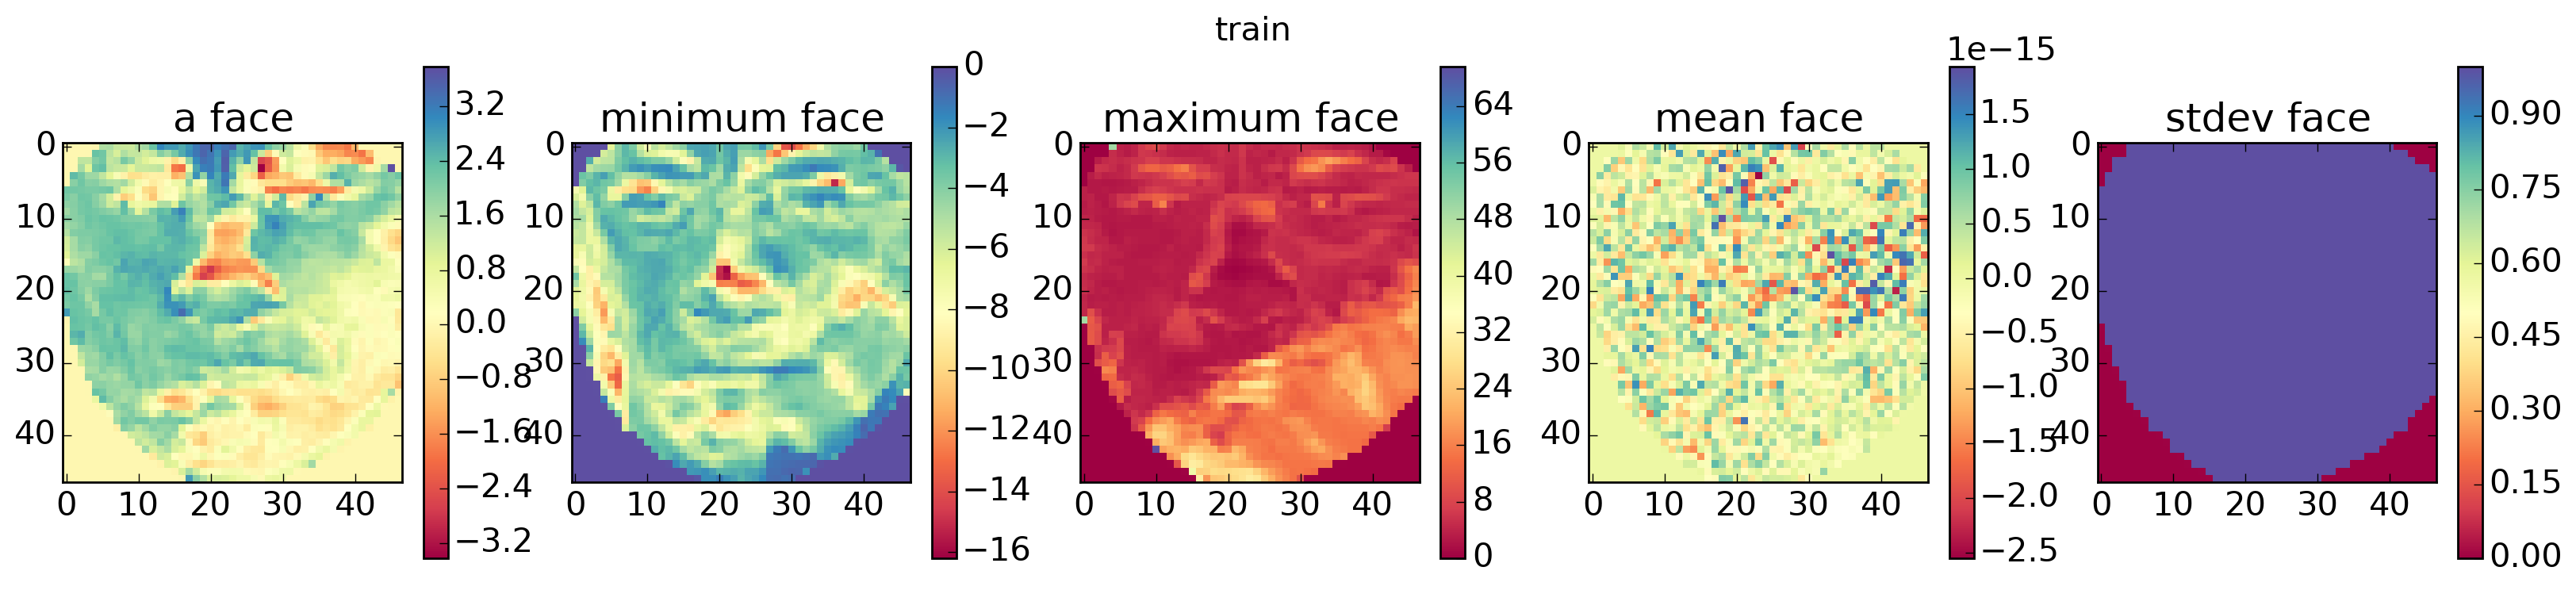

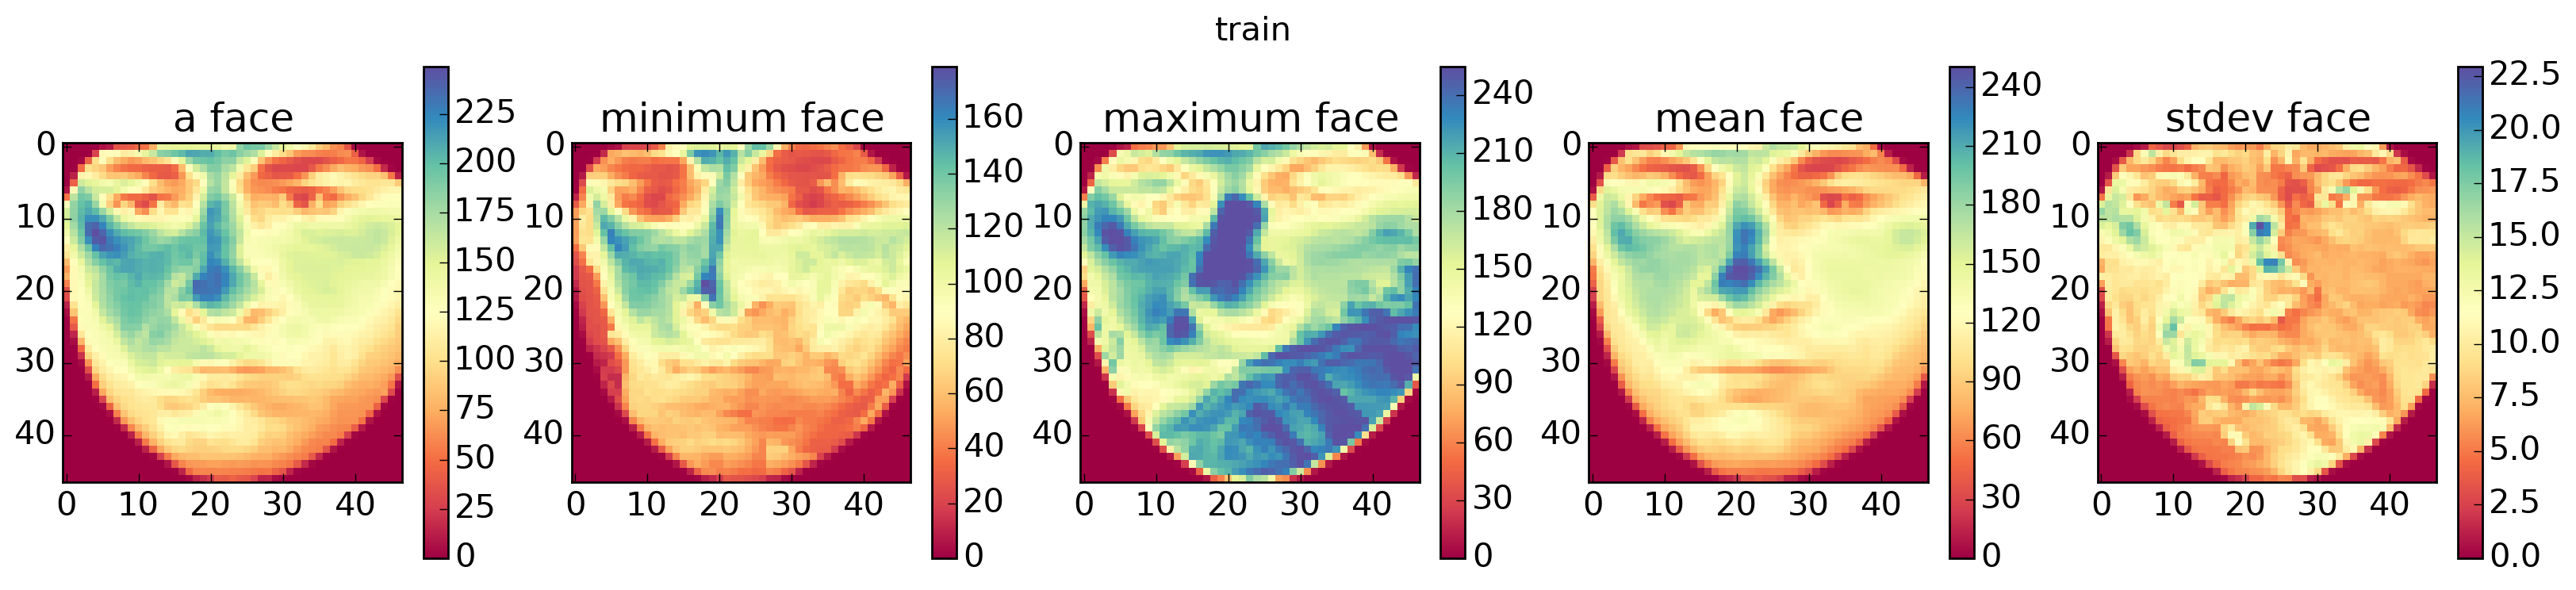

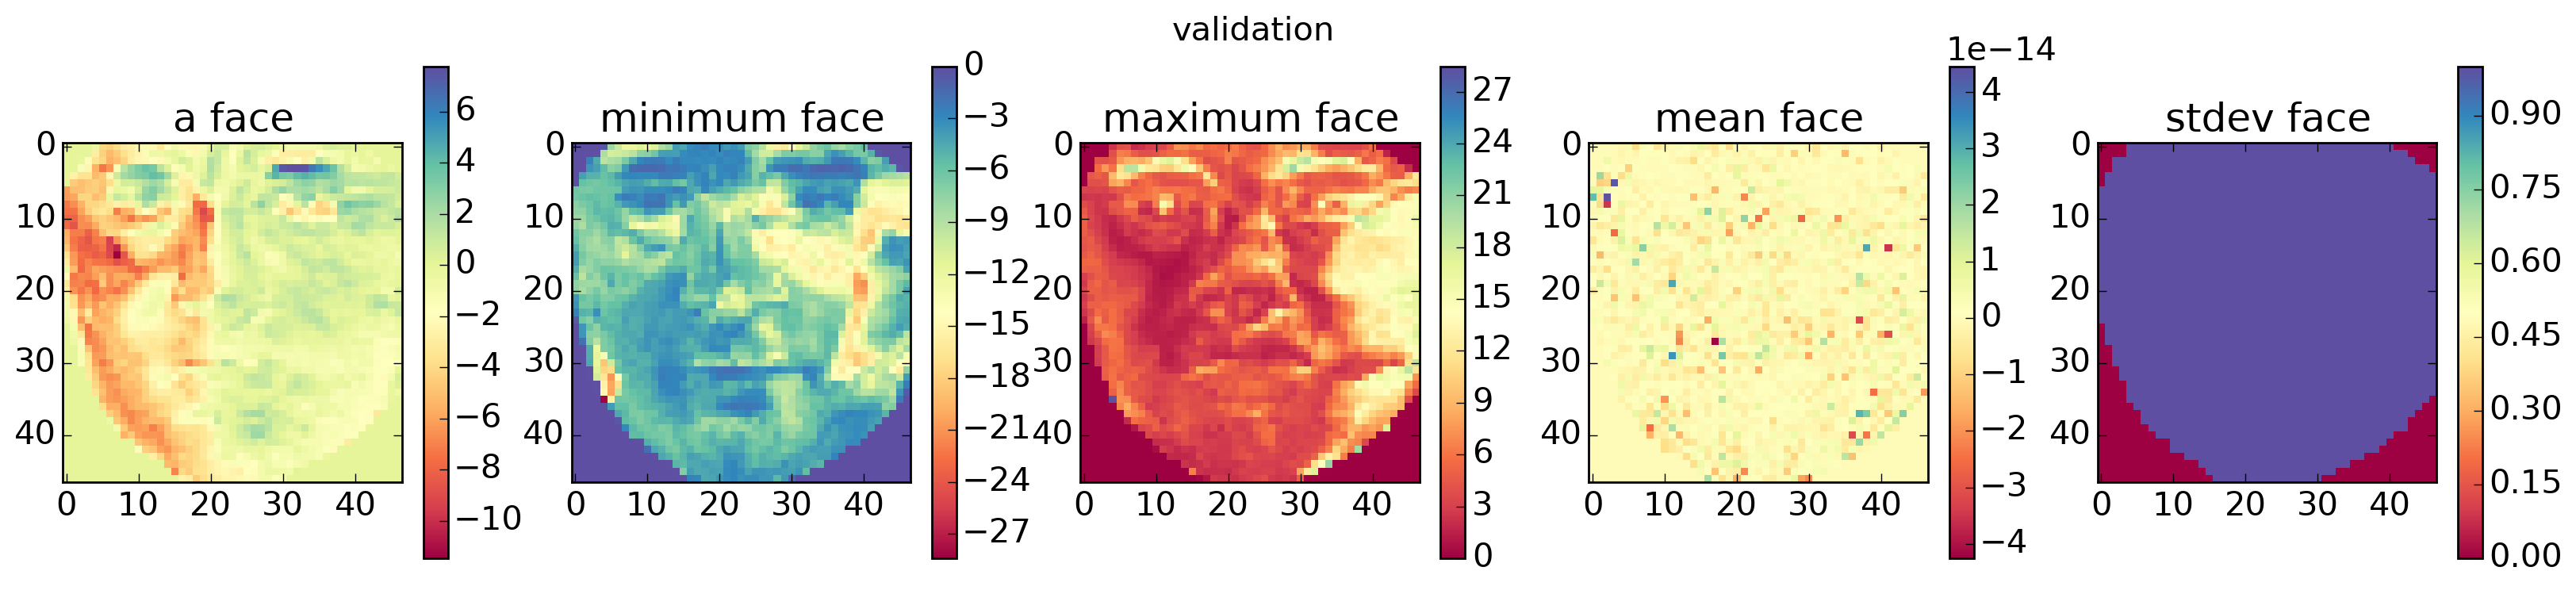

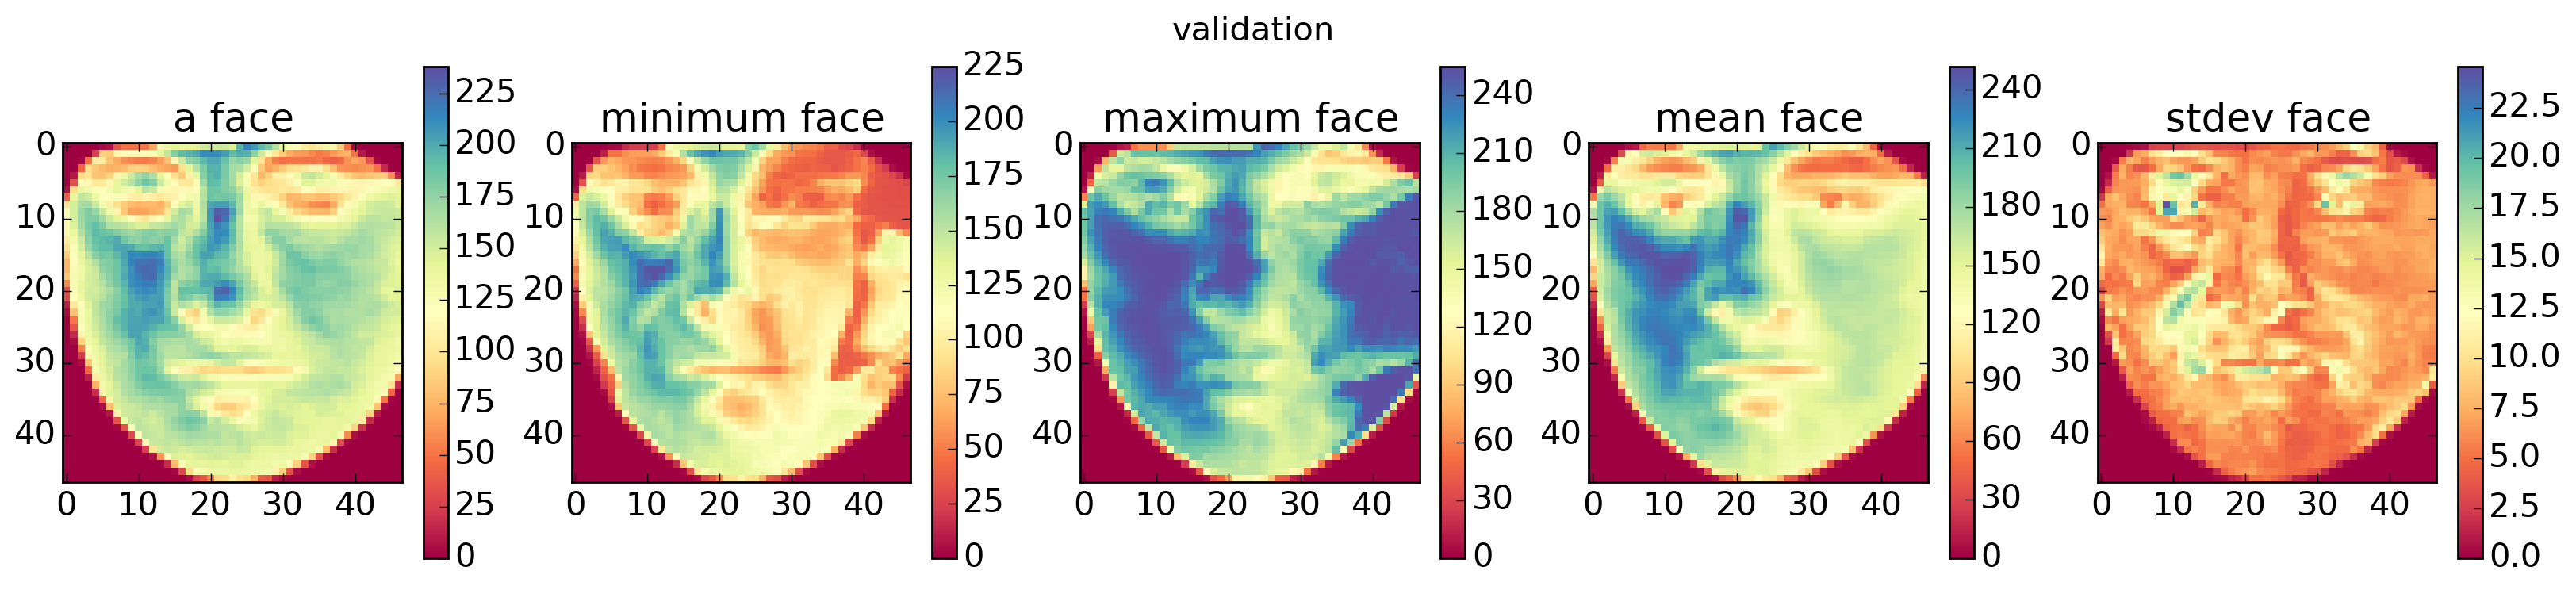

In [6]:
dataset_stats(normalisation_type='face',scaling=None)

# face, [-1,1]

Working....
Setting up folder structure.
Saving config file to /tmp/2016_07_26/103
OPENING  /tmp/2016_07_26/103/NOT_FINISHED
Creating train batch.
Loading labels and images for subjects: [1]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


face


Applying scaling:  [-1,1]
Creating validation batch.
Loading labels and images for subjects: [2]
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN002_features_images.mat


face


Applying scaling:  [-1,1]
Done.
(4845, 47, 47)
(4845, 47, 47)


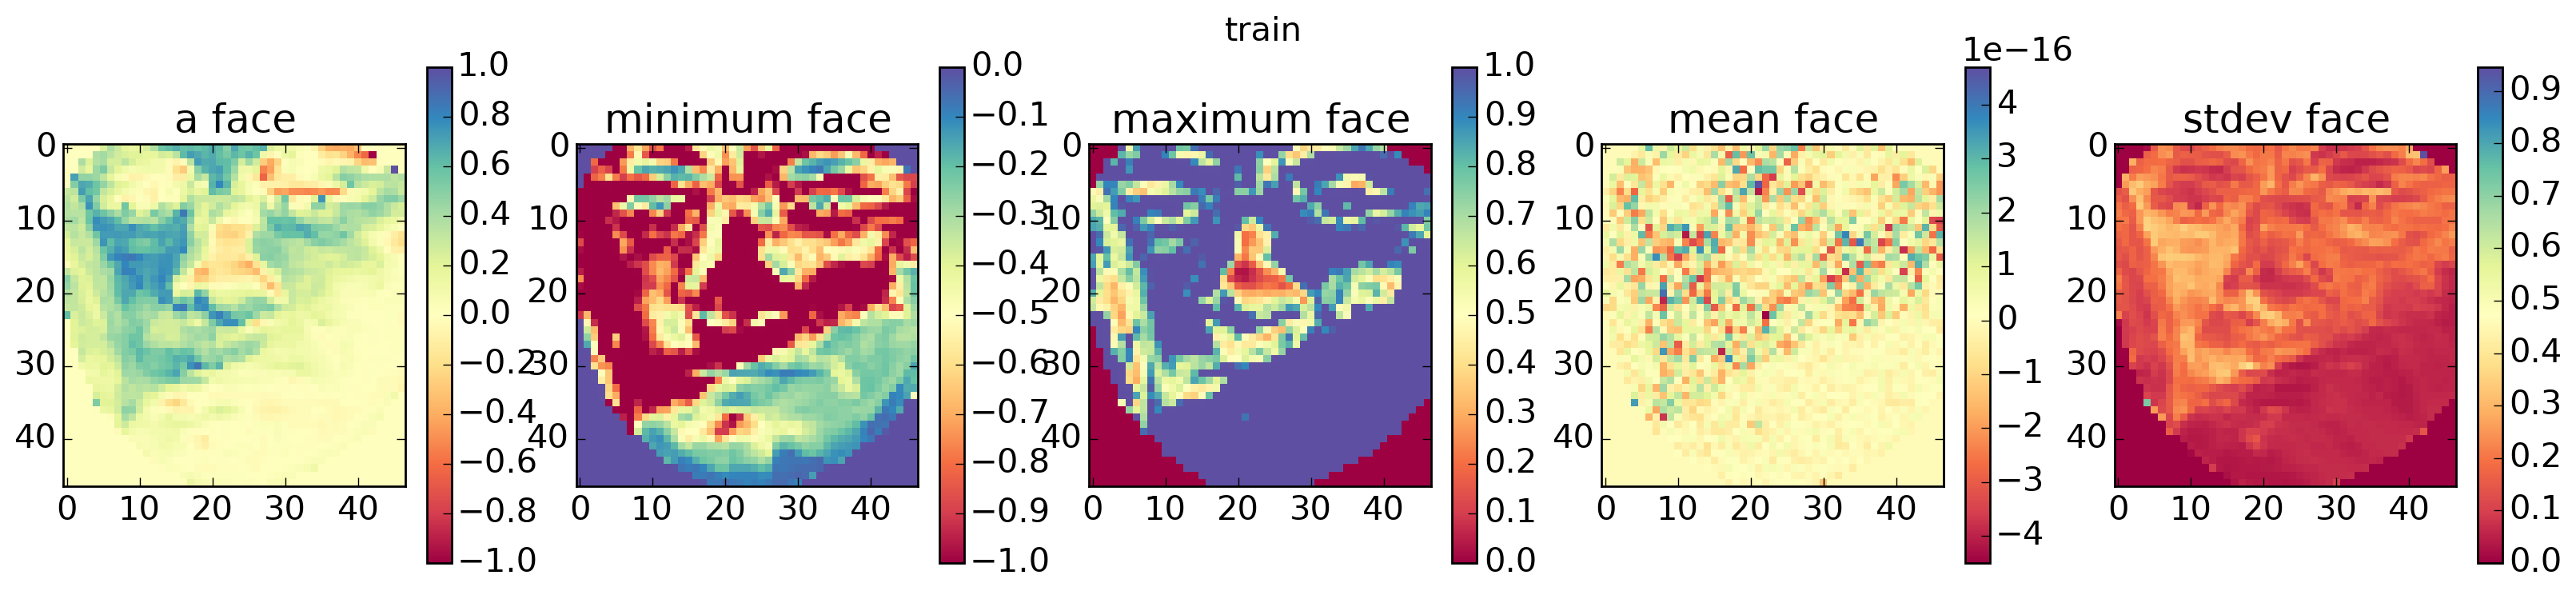

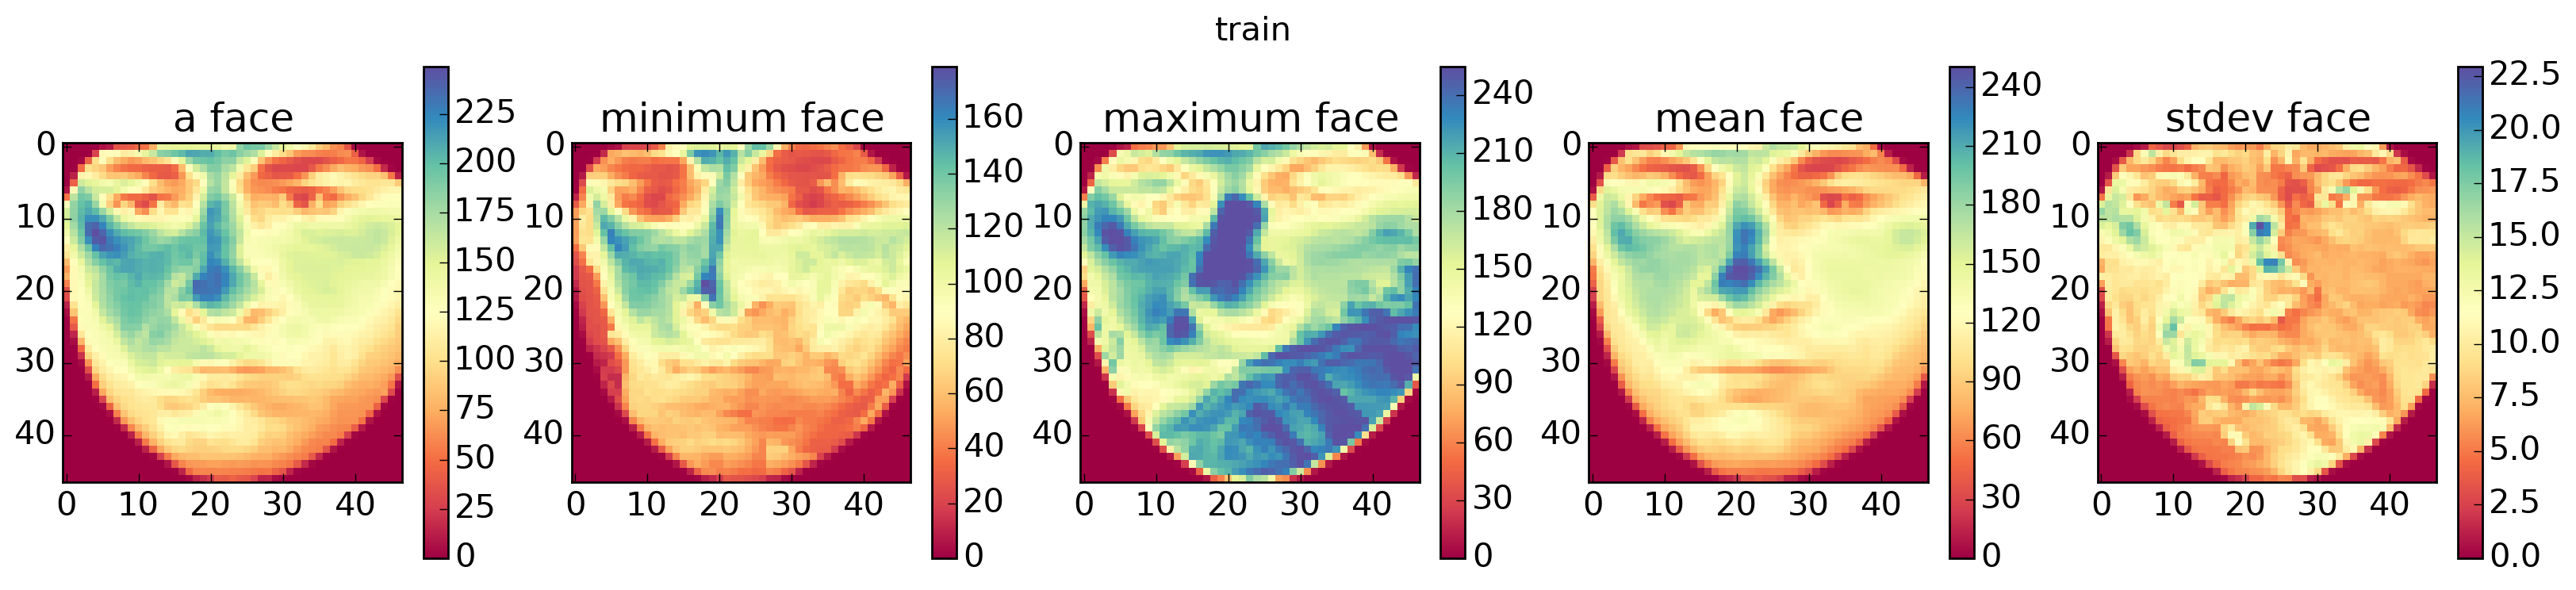

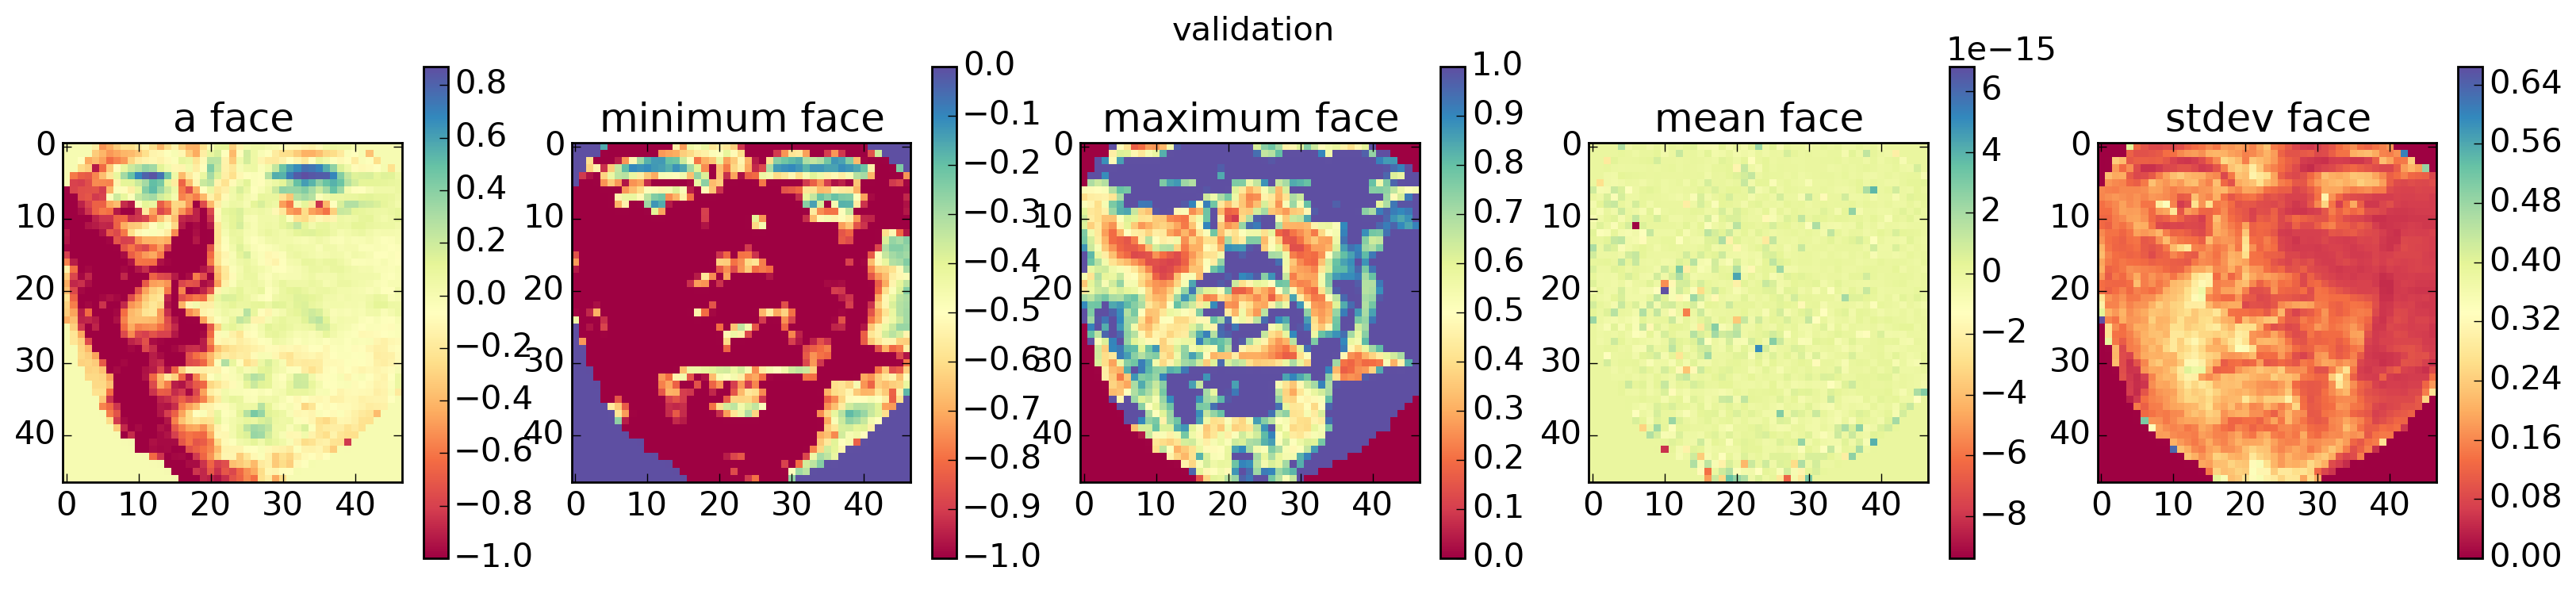

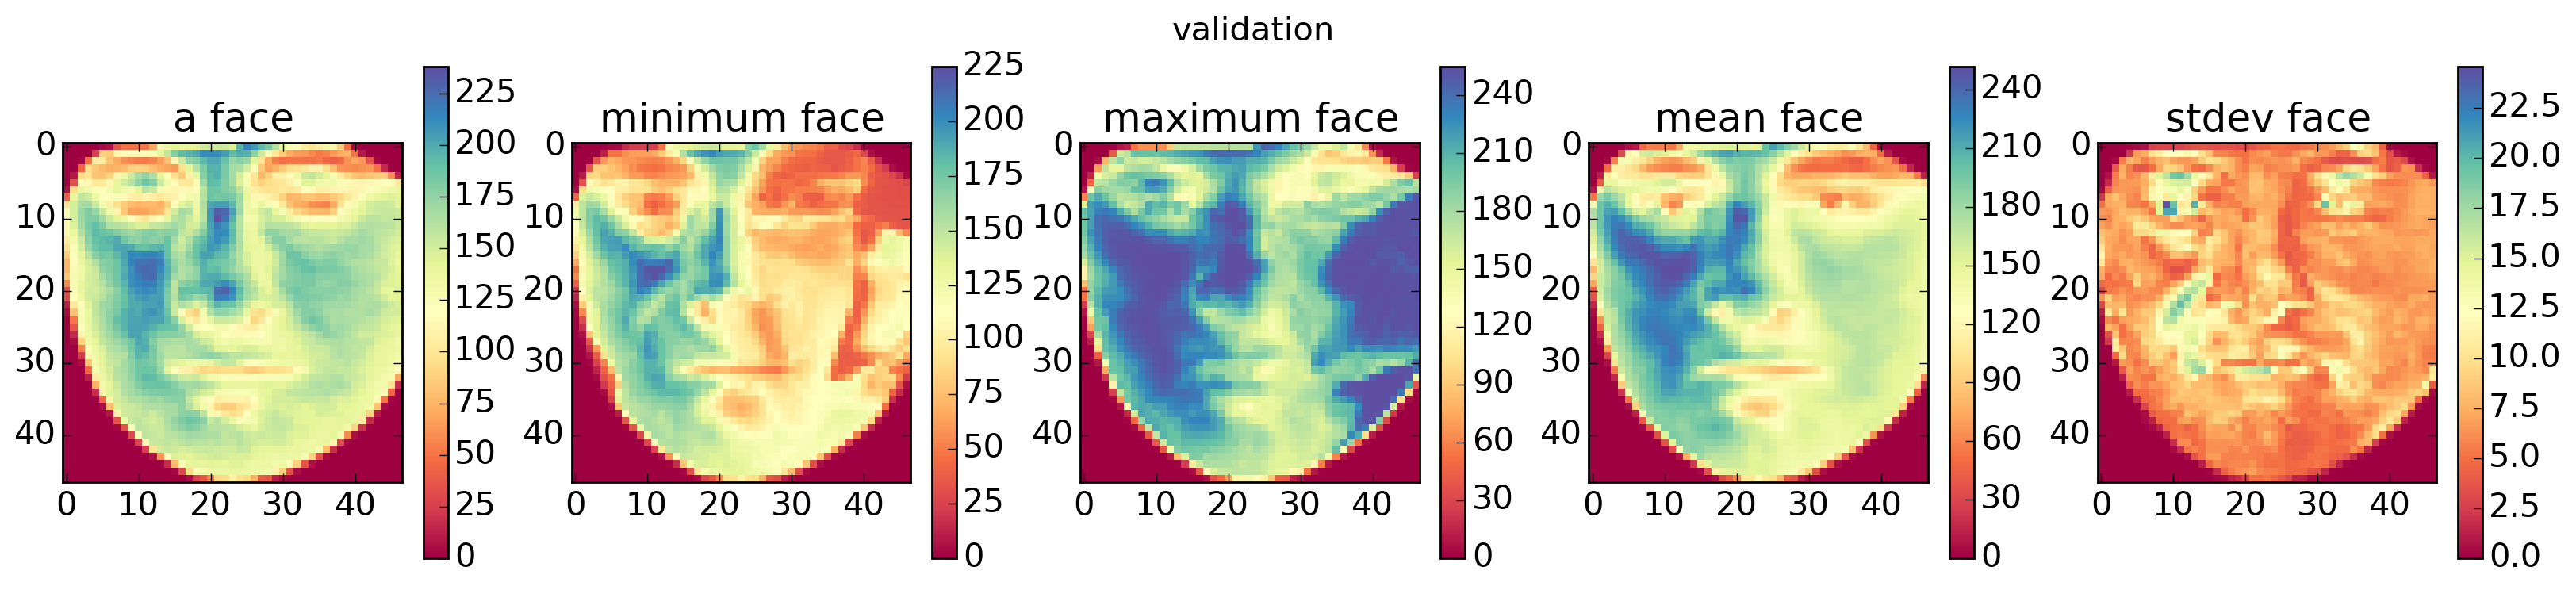

In [7]:
dataset_stats(normalisation_type='face',scaling='[-1,1]')

In [ ]:
a = np.random.randint(-1,1,(4,4))


def zeros_to_ones(array):
    return array + (array == 0.0).astype(array.dtype)
print zeros_to_ones(a) - a